In [ ]:
import numpy as np
import pandas as pd


In [3]:
df1 =pd.read_csv('spam.csv', encoding='latin-1')
df1 = df1[['v1', 'v2']]   
df1.shape

(5572, 2)

In [4]:
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df1.columns

Index(['v1', 'v2'], dtype='object')

In [6]:
df1.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df1.columns

Index(['v1', 'v2'], dtype='object')

In [13]:
df2 = df1.rename(columns={'v1': 'goal', 'v2': 'message'})
df2.head()

,goal,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df2.shape

(5572, 2)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df2['goal'] = le.fit_transform(df2['goal'])
df2.head()

,goal,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df2.isnull().sum()  

goal       0
message    0
dtype: int64

In [18]:
df2.duplicated().sum()

np.int64(403)

In [19]:
df3= df2.drop_duplicates(keep='first')
df3.shape

(5169, 2)

In [20]:
df3.duplicated().sum()

np.int64(0)

In [21]:
df3.head()

,goal,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df3['goal'].value_counts()

goal
0    4516
1     653
Name: count, dtype: int64

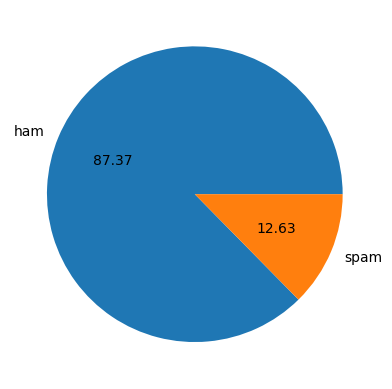

In [24]:
import matplotlib.pyplot as plt
plt.pie(df3['goal'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kabin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [28]:
df3['num_characters'] = df3['message'].apply(len)

C:\Users\kabin\AppData\Local\Temp\ipykernel_24568\1048662012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['num_characters'] = df3['message'].apply(len)


In [29]:
df3.head()

,goal,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kabin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [36]:
df3['num_words'] = df3['message'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\kabin\AppData\Local\Temp\ipykernel_24568\1089915279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['num_words'] = df3['message'].apply(lambda x: len(nltk.word_tokenize(x)))


In [37]:
df3.head()

,goal,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [38]:
df3['num_sentences'] = df3['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\kabin\AppData\Local\Temp\ipykernel_24568\2009294019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['num_sentences'] = df3['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [44]:
df3.head(10)

,goal,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [42]:
df3['num_characters'].describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: num_characters, dtype: float64

In [43]:
df3[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [47]:
df3[df3['goal']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [48]:
df3[df3['goal']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [49]:
import seaborn as sns

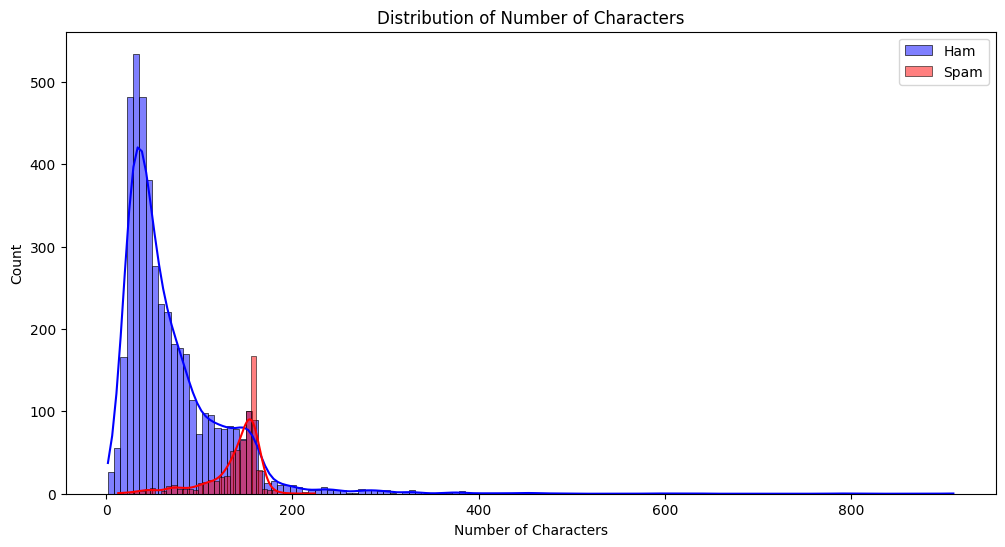

In [50]:
plt.figure(figsize=(12, 6))
sns.histplot(df3[df3['goal'] == 0]['num_characters'], color='blue', label='Ham', kde=True)
sns.histplot(df3[df3['goal'] == 1]['num_characters'], color='red', label='Spam', kde=True)
plt.title('Distribution of Number of Characters')           
plt.xlabel('Number of Characters')
plt.legend()
plt.show()

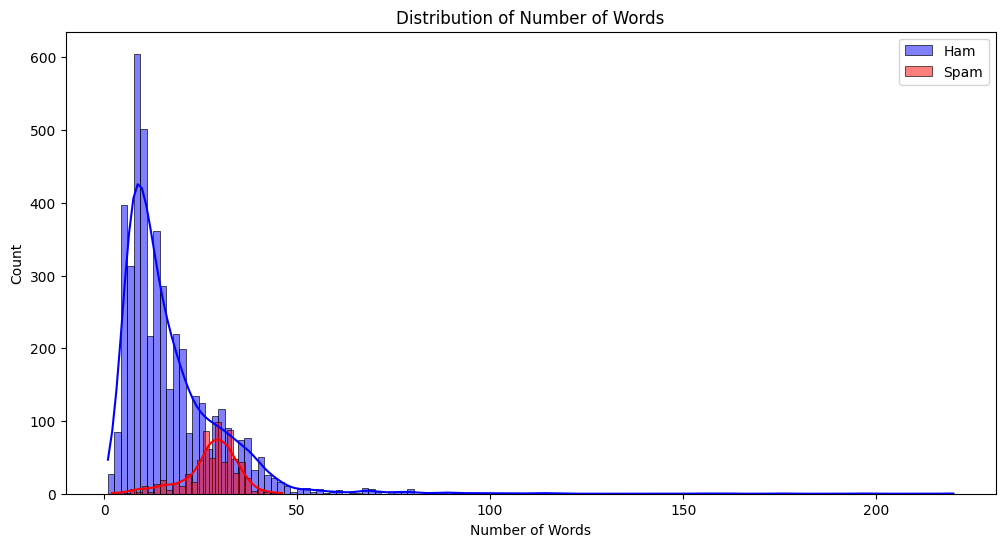

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(df3[df3['goal'] == 0]['num_words'], color='blue', label='Ham', kde=True)
sns.histplot(df3[df3['goal'] == 1]['num_words'], color='red', label='Spam', kde=True)
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.legend()
plt.show()

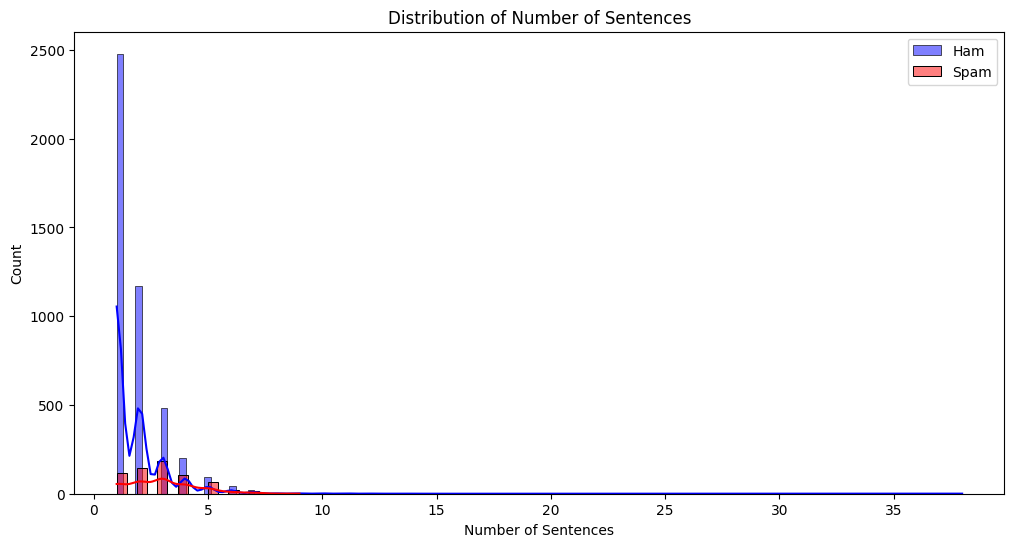

In [52]:
plt.figure(figsize=(12, 6))
sns.histplot(df3[df3['goal'] == 0]['num_sentences'], color='blue', label='Ham', kde=True)
sns.histplot(df3[df3['goal'] == 1]['num_sentences'], color='red', label='Spam', kde=True)
plt.title('Distribution of Number of Sentences')
plt.xlabel('Number of Sentences')
plt.legend()
plt.show()

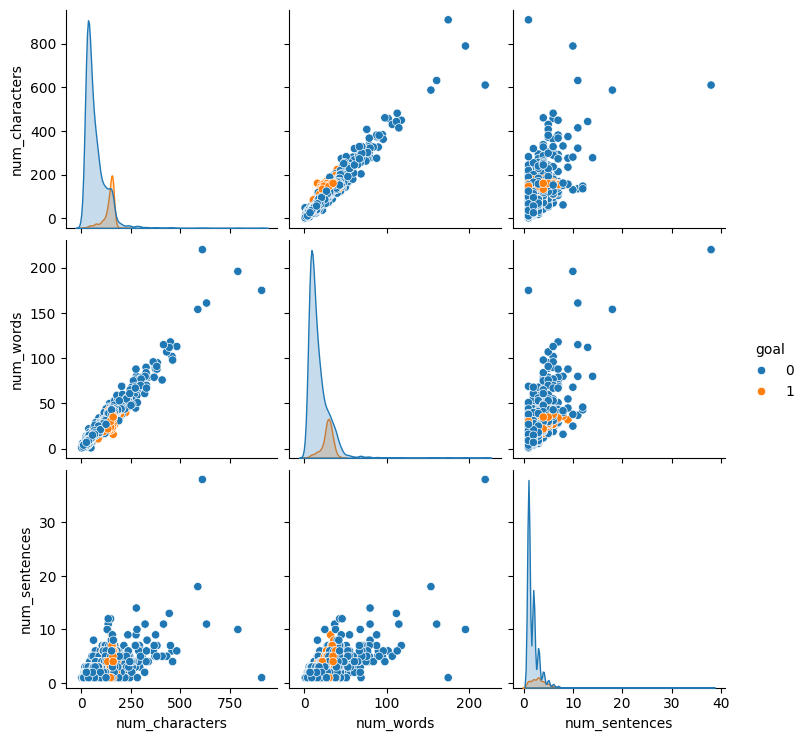

In [53]:
sns.pairplot(df3, hue='goal')
plt.show()

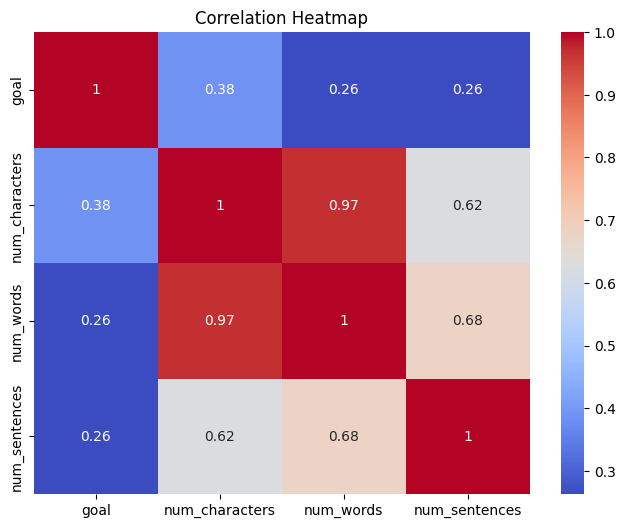

In [64]:
numeric_df = df3.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()